In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from sklearn import linear_model
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('datasets/nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [5]:
## 'BPXSY1' y 'RIDAGEYR'

In [6]:
model = sm.OLS.from_formula('BPXSY1~RIDAGEYR',data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     1524.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          6.35e-294
Time:                        04:39:11   Log-Likelihood:                -22745.
No. Observations:                5401   AIC:                         4.549e+04
Df Residuals:                    5399   BIC:                         4.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.5144      0.619    165.540      0.000     101.300     103.728
RIDAGEYR       0.4692      0.012     39.043      0.000       0.446       0.493
==============================================================================
Omnibus:                      784.418   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1825.182
Skew:                           0.840   Prob(JB):                         0.00
Kurtosis:                       5.299   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
x = result.fittedvalues
y = result.resid

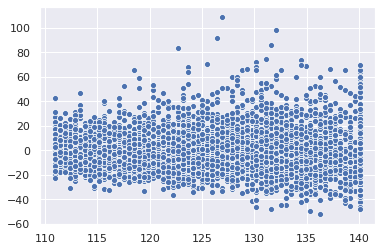

In [8]:
fig = sns.scatterplot( x = x,
                       y = y,
                     )

In [9]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [15]:
## pregunta 5 

## calcular 'BPXSY1'
## basado en 'RIDAGEYR'y 'RIAGENDR' 'BMXBMI'

#da.["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male",2:"Female"})


In [16]:
model = sm.OLS.from_formula('BPXSY1~RIDAGEYR + BMXBMI + RIAGENDR',data=df) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     574.7
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          9.88e-324
Time:                        04:44:20   Log-Likelihood:                -22409.
No. Observations:                5347   AIC:                         4.483e+04
Df Residuals:                    5343   BIC:                         4.485e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.5582      1.233     80.771      0.000      97.142     101.975
RIDAGEYR       0.4614      0.012     38.832      0.000       0.438       0.485
BMXBMI         0.3078      0.031      9.802      0.000       0.246       0.369
RIAGENDR      -3.7808      0.439     -8.607      0.000      -4.642      -2.920
==============================================================================
Omnibus:                      806.802   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1980.135
Skew:                           0.852   Prob(JB):                         0.00
Kurtosis:                       5.447   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

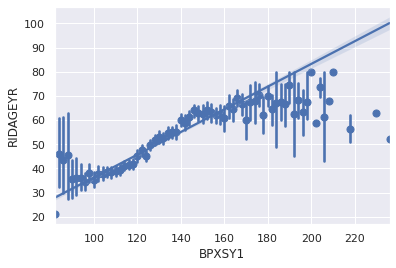

In [18]:
## pregunta 4 
ax = sns.regplot(x = 'BPXSY1',
                 y = 'RIDAGEYR',
                 x_estimator = np.mean,
                 data = df)